In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,cm
import random
import operator
from functools import reduce

**Michaelwicz**

In [ ]:
def michalewicz(x):
    result = reduce(lambda acc, x: acc + np.sin(x) * np.power(np.sin((0 + 1) * np.power(x, 2) / np.pi), 2 * 10), x, 0.)
    return -1.0*result

**Ackley**

In [3]:
def ackley(x):
    return -20*np.exp(-0.2*np.sqrt((x[0]**2+x[1]**2)/2)) - np.exp(0.5*(np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1]))) + 20 + np.exp(1)

**De Jong**

In [4]:
def dejong(x):
    ans = 0
    for i in range(min(len(x),256)):
        ans+=np.power(x[i],4)
    return ans

**Yang**

In [5]:
def yang(x):
#     Yang N.2 function
    temp1 = 0
    temp2 = 0
    for i in range(min(len(x),16)):
        temp2+=np.sin(np.power(x[i],2))
        temp1+=np.absolute(x[i])
    ans =  temp1*np.exp(temp2*-1)
    return ans

**Rosenbrock**

In [6]:
def rosenbrock(x):
    ans=0.0
    for i in range(min(len(x),16)):
        ans+=(100.0*(x[i]-x[i]**2)**2 + (1-x[i])**2)
    return ans

**Griewank**

In [7]:
def griewank(x):
    ans = 1.0
    inner_product = 1.0
    inner_sum = 0.0
    i=0
    while i < (len(x)):#change to while
        inner_sum += (x[i] ** 2)
        inner_product *= (np.cos(x[i] / np.sqrt(i + 1)))
        i+=1
    ans += (inner_sum * (1. / 4000.) - inner_product)
    return ans

**Shubert**

In [8]:
def shubert(x):
        temp1 = 0
        temp2 = 0
        i=0
        while i < (5): #Change to while
            temp1 += ((i+1)*np.cos((i+1)+(i+2)*x[0]))
            temp2 += ((i+1)*np.cos((i+1)+(i+2)*x[1]))
            i+=1
        return temp1*temp2

**Rastrigin**

In [9]:
def rastrigin(x):
    ans = 0.0
    i=0
    while i< (len(x)):#Change to while
        ans += (x[i] ** 2 - (10. * np.cos(2 * np.pi * x[i])))
        i+=1
    ans += 10. * len(x)
    return ans

**Schwefel**

In [10]:
def schwefel(x):
    ans=418.982887*len(x)
    for i in range(min(len(x),128)):
        ans-=x[i]*np.sin(np.sqrt(np.abs(x[i])))
    return ans

**Easom**

In [11]:
def easom(x):
    return -1.0*np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0] - np.pi)**2 - (x[1] - np.pi)**2)

In [12]:
class Firefly():
    def __init__(self, alpha, beta, gamma, upper_boundary, lower_boundary, function_dimension):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.__intensity = None
        self.lower_boundary = lower_boundary
        self.upper_boundary = upper_boundary
        self.__position = np.array([random.uniform(self.lower_boundary, self.upper_boundary) for x in range(function_dimension)])
    
    
    @property
    def intensity(self):
        return self.__intensity

        
    @property
    def position(self):
        return self.__position
    
    @position.setter
    def position(self, value):
        self.__position = value

    def move_towards(self, better_position):
        # euclidean distance
        distance = np.linalg.norm(self.__position - better_position)
        self.__position = self.__position + self.beta*np.exp(-self.gamma*(distance**2)) * (better_position-self.__position) +  self.alpha*(random.uniform(0, 1)-0.5)
        self.check_boundaries()

    def random_walk(self, area):
        self.__position = np.array([random.uniform(cord-area, cord+area) for x, cord in np.ndenumerate(self.__position)])
    def update_intensity(self, func):
        self.__intensity = -1*func(self.__position)
    def check_boundaries(self):
        for i, cord in np.ndenumerate(self.__position):
            if cord < self.lower_boundary:
                self.__position[i] = self.lower_boundary
            elif cord > self.upper_boundary:
                self.__position[i] = self.upper_boundary
            else:
                self.__position[i] = cord


In [13]:
class FireflyProblem():
    
    def __init__(self, function, firefly_number, upper_boundary=5.12, lower_boundary=-5.12, alpha=2, beta=2, gamma=0.97, iteration_number=50, interval=500, continuous=False):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.function_dimension = 2
        self.upper_boundary = upper_boundary
        self.lower_boundary = lower_boundary
        self.iteration_number = iteration_number
        self.fireflies = [Firefly(self.alpha,self.beta,self.gamma,self.upper_boundary,self.lower_boundary, self.function_dimension) for x in range(firefly_number)]
        self.function = function
        self.interval = interval
        self.best = None
        self.continuous = continuous
        self.cost=[]
        i=0
        while i<(len(self.fireflies)): #Change to while
            (self.fireflies)[i].update_intensity(self.function)
            i+=1

    def run(self):
        y = np.linspace(self.lower_boundary, self.upper_boundary, 100)
        x = np.linspace(self.lower_boundary, self.upper_boundary, 100)
        X, Y = np.meshgrid(x, y)
        z = self.function([X, Y])        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)  # pylint: disable=no-member
        fig.colorbar(cs)
        x_init = []
        y_init = []
        i=0
        while i<(len(self.fireflies)):#change to while
            x_init.append((self.fireflies)[i].position[0])
            y_init.append((self.fireflies)[i].position[1])
            i+=1
        particles, = ax.plot(x_init, y_init, 'ro', ms=6)
        rectangle = plt.Rectangle([self.lower_boundary, self.lower_boundary],self.upper_boundary-self.lower_boundary,self.upper_boundary-self.lower_boundary, ec='none', lw=2, fc='none')
        ax.add_patch(rectangle)
#         self.plot()

        def init():
            particles.set_data([], [])
            rectangle.set_edgecolor('none')
            return particles, rectangle

        def animate(i): #Generate animation and visualization
            x = []
            y = []
            ms = int(50. * fig.get_figwidth()/fig.dpi)
            rectangle.set_edgecolor('k')
            fig.canvas.set_window_title('Iteration %s/%s' % (i, self.iteration_number))
            if i ==0:
                print("reset the fireflies")
                self.best = None

            for idx, firefly in enumerate(self.fireflies):
                if i == 0:
                    firefly.__position = np.array([x_init[idx], y_init[idx]])
                    firefly.update_intensity(self.function)
                    fig.canvas.set_window_title('Initialization')
                x.append(firefly.position[0])
                y.append(firefly.position[1])
            self.step()
            particles.set_data(x, y)
            particles.set_markersize(ms)
            return particles, rectangle        
        graph = animation.FuncAnimation(fig, animate, frames=self.iteration_number+1, interval=self.interval, blit=True, init_func=init, repeat=self.continuous)
        plt.show()
        if (not self.best or self.fireflies[0].intensity > self.best):
            self.best = self.fireflies[0].intensity
        if(self.function==michalewicz):
            graph.save('firefly_michalewicz.gif')
        elif(self.function==easom):
            graph.save('firefly_easom.gif')            
        elif(self.function==shubert):
            graph.save('firefly_shubert.gif')            
        elif(self.function==ackley):
            graph.save('firefly_ackley.gif')
        elif(self.function==rosenbrock):
            graph.save('firefly_rosenbrock.gif')
        elif(self.function==dejong):
            graph.save('firefly_dejong.gif')
        elif(self.function==griewank):
            graph.save('firefly_griewank.gif')
        elif(self.function==yang):
            graph.save('firefly_yang.gif')            
        elif(self.function==rastrigin):
            graph.save('firefly_rastrigin.gif')
    def step(self):
        (self.fireflies).sort(key=operator.attrgetter('intensity'), reverse=True)
        for i in self.fireflies:
            for j in self.fireflies:
                if j.intensity > i.intensity:
                    i.move_towards(j.position)
                    i.update_intensity(self.function)
     
        if (not self.best or (self.fireflies[0].intensity > self.best) ):
            self.best = self.fireflies[0].intensity
        if(self.function==michalewicz):
            gmin = -1.8013
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
        elif(self.function==easom):
            gmin = -1
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
            
        elif(self.function==shubert):
            gmin = -186.7309
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
            
        elif(self.function==ackley):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==rosenbrock):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))

        elif(self.function==dejong):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==griewank):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==yang):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==rastrigin):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        (self.fireflies)[0].random_walk(0.1)
        (self.fireflies)[0].update_intensity(self.function)
    
    def plot(self):
        X_Axis=range(1,self.iteration_number+2)
        plt.plot(X_Axis,self.cost)
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.show()
        

In [14]:
def run_firefly_algorithm(optimizer,fireflies_number = 40,upper_boundary=5.12, lower_boundary=-5.12, alpha=2, beta=2, gamma=0.97, iteration_number=10, interval=500):
    out = FireflyProblem(optimizer, fireflies_number,upper_boundary, lower_boundary, alpha, beta, gamma, iteration_number, interval)
    out.run()
    out.plot()

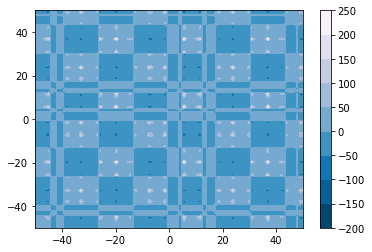

reset the fireflies
Overall best intensity: 38.53367297856559, Overall best Accuracy: 20.63593812195281
Overall best intensity: 98.19897719559863, Overall best Accuracy: 52.5884988481278
Overall best intensity: 104.20579648494103, Overall best Accuracy: 55.80533081827434
Overall best intensity: 104.20579648494103, Overall best Accuracy: 55.80533081827434
Overall best intensity: 149.38568954698002, Overall best Accuracy: 80.00051922150003
Overall best intensity: 149.38568954698002, Overall best Accuracy: 80.00051922150003
Overall best intensity: 160.44421872288623, Overall best Accuracy: 85.92269341757913
Overall best intensity: 162.67490081607832, Overall best Accuracy: 87.11729061236161
Overall best intensity: 162.67490081607832, Overall best Accuracy: 87.11729061236161
Overall best intensity: 185.3014351980995, Overall best Accuracy: 99.23447870604146
Overall best intensity: 185.3014351980995, Overall best Accuracy: 99.23447870604146
Overall best intensity: 185.3014351980995, Overall

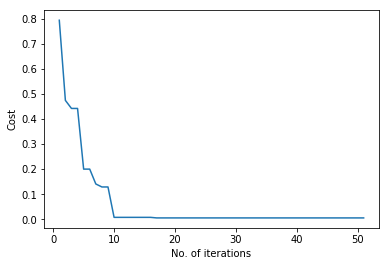

In [15]:
run_firefly_algorithm(shubert,40,50,-50,2, 2,0.97, 50,100)

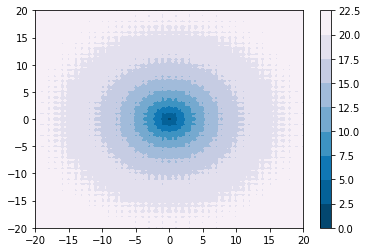

reset the fireflies
Overall best intensity: -7.589360401155082, Overall best Accuracy: 658.9360401155081
Overall best intensity: -6.132721524164143, Overall best Accuracy: 513.2721524164143
Overall best intensity: -6.132721524164143, Overall best Accuracy: 513.2721524164143
Overall best intensity: -6.132721524164143, Overall best Accuracy: 513.2721524164143
Overall best intensity: -6.132721524164143, Overall best Accuracy: 513.2721524164143
Overall best intensity: -6.132721524164143, Overall best Accuracy: 513.2721524164143
Overall best intensity: -4.1942614738540485, Overall best Accuracy: 319.4261473854049
Overall best intensity: -3.161112512528533, Overall best Accuracy: 216.11125125285332
Overall best intensity: -3.159430552483276, Overall best Accuracy: 215.9430552483276
Overall best intensity: -3.028134232991317, Overall best Accuracy: 202.8134232991317
Overall best intensity: -2.8138598306484046, Overall best Accuracy: 181.38598306484047
Overall best intensity: -1.94738395779846

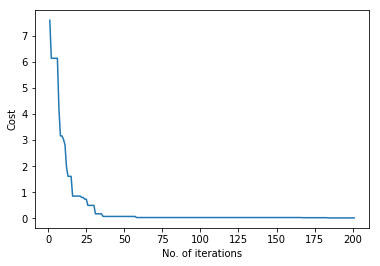

In [16]:
run_firefly_algorithm(ackley,40,20,-20,1,5,0.5,200,50)

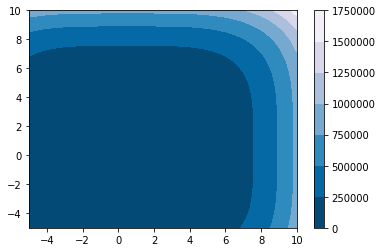

reset the fireflies
Overall best intensity: -19.80998239848772, Overall best Accuracy: 1880.9982398487718
Overall best intensity: -14.47951524416225, Overall best Accuracy: 1347.951524416225
Overall best intensity: -3.0142022671884874, Overall best Accuracy: 201.42022671884874
Overall best intensity: -2.0829916569230913, Overall best Accuracy: 108.29916569230913
Overall best intensity: -0.6770188002692801, Overall best Accuracy: 32.29811997307199
Overall best intensity: -0.3686212186980867, Overall best Accuracy: 63.13787813019134
Overall best intensity: -0.26958962399882613, Overall best Accuracy: 73.04103760011739
Overall best intensity: -0.26958962399882613, Overall best Accuracy: 73.04103760011739
Overall best intensity: -0.22109669712428154, Overall best Accuracy: 77.89033028757184
Overall best intensity: -0.22109669712428154, Overall best Accuracy: 77.89033028757184
Overall best intensity: -0.19834228118312253, Overall best Accuracy: 80.16577188168775
Overall best intensity: -0.1

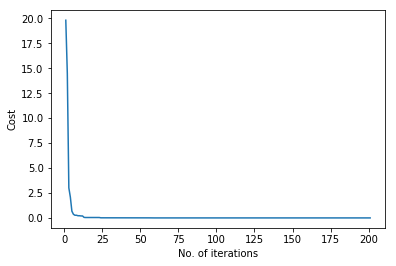

In [17]:
run_firefly_algorithm(rosenbrock,40,10,-5,1,5,0.5,200,50)


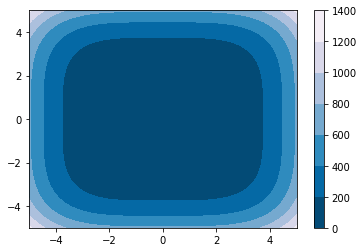

reset the fireflies
Overall best intensity: -1.7253984632922441, Overall best Accuracy: 72.53984632922442
Overall best intensity: -0.00016918092579040728, Overall best Accuracy: 99.98308190742095
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.99997664116971
Overall best intensity: -2.3358830295124518e-07, Overall best Accuracy: 99.999976641

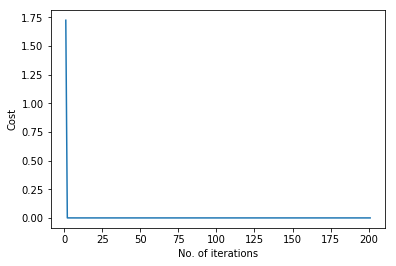

In [18]:
run_firefly_algorithm(dejong,40,5,-5,1,5,0.5,200,50)

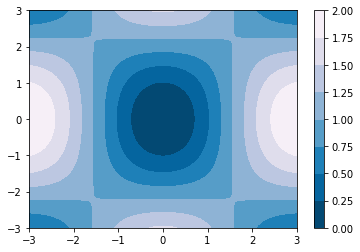

reset the fireflies
Overall best intensity: -0.016577682760744672, Overall best Accuracy: 98.34223172392554
Overall best intensity: -0.0018305155445651478, Overall best Accuracy: 99.81694844554349
Overall best intensity: -0.0006915648379473005, Overall best Accuracy: 99.93084351620527
Overall best intensity: -0.0002866339119680372, Overall best Accuracy: 99.9713366088032
Overall best intensity: -0.0002866339119680372, Overall best Accuracy: 99.9713366088032
Overall best intensity: -0.0002866339119680372, Overall best Accuracy: 99.9713366088032
Overall best intensity: -9.406946435808194e-05, Overall best Accuracy: 99.9905930535642
Overall best intensity: -9.406946435808194e-05, Overall best Accuracy: 99.9905930535642
Overall best intensity: -9.406946435808194e-05, Overall best Accuracy: 99.9905930535642
Overall best intensity: -9.406946435808194e-05, Overall best Accuracy: 99.9905930535642
Overall best intensity: -9.406946435808194e-05, Overall best Accuracy: 99.9905930535642
Overall be

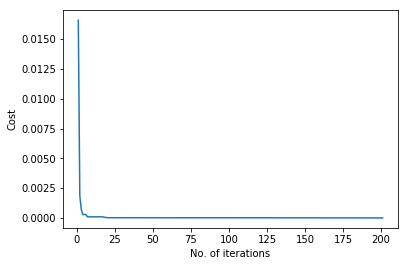

In [19]:
run_firefly_algorithm(griewank,40,3,-3,1,5,0.5,200,50)

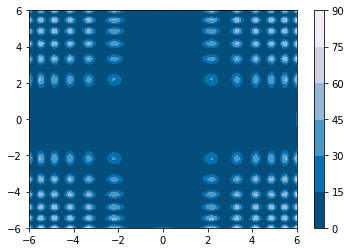

reset the fireflies
Overall best intensity: -0.45927045441121406, Overall best Accuracy: 54.07295455887859
Overall best intensity: -0.25350996759706057, Overall best Accuracy: 74.64900324029394
Overall best intensity: -0.057199916548141036, Overall best Accuracy: 94.28000834518589
Overall best intensity: -0.057199916548141036, Overall best Accuracy: 94.28000834518589
Overall best intensity: -0.057199916548141036, Overall best Accuracy: 94.28000834518589
Overall best intensity: -0.057199916548141036, Overall best Accuracy: 94.28000834518589
Overall best intensity: -0.050567922330283004, Overall best Accuracy: 94.94320776697171
Overall best intensity: -0.050567922330283004, Overall best Accuracy: 94.94320776697171
Overall best intensity: -0.050567922330283004, Overall best Accuracy: 94.94320776697171
Overall best intensity: -0.04220441820114171, Overall best Accuracy: 95.77955817988583
Overall best intensity: -0.04220441820114171, Overall best Accuracy: 95.77955817988583
Overall best int

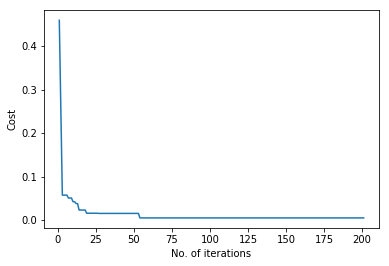

In [20]:
run_firefly_algorithm(yang,40,6,-6,1,5,0.5,200,100)

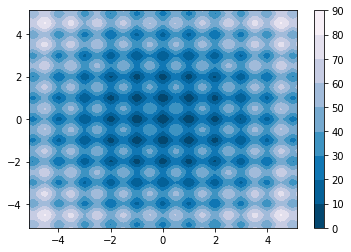

reset the fireflies
Overall best intensity: -4.655668247562243, Overall best Accuracy: 365.5668247562243
Overall best intensity: -1.7478572677720834, Overall best Accuracy: 74.78572677720834
Overall best intensity: -1.0768340483752077, Overall best Accuracy: 7.683404837520769
Overall best intensity: -1.0300538642412533, Overall best Accuracy: 3.0053864241253336
Overall best intensity: -1.0300538642412533, Overall best Accuracy: 3.0053864241253336
Overall best intensity: -1.0300538642412533, Overall best Accuracy: 3.0053864241253336
Overall best intensity: -1.0300538642412533, Overall best Accuracy: 3.0053864241253336
Overall best intensity: -1.0300538642412533, Overall best Accuracy: 3.0053864241253336
Overall best intensity: -1.0300538642412533, Overall best Accuracy: 3.0053864241253336
Overall best intensity: -0.4244585235537315, Overall best Accuracy: 57.55414764462685
Overall best intensity: -0.4244585235537315, Overall best Accuracy: 57.55414764462685
Overall best intensity: -0.42

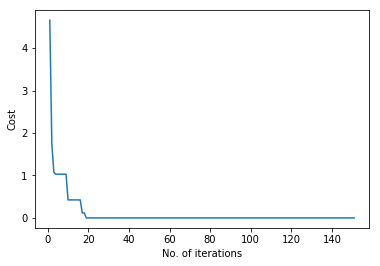

In [21]:
run_firefly_algorithm(rastrigin,40,5.12,-5.12,1,5,0.5,150,100)

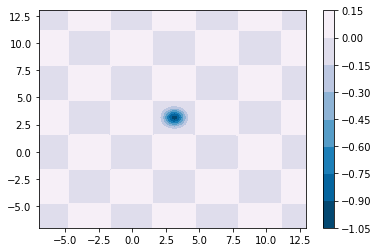

reset the fireflies
Overall best intensity: 1.1442214936653064e-06, Overall best Accuracy: 0.0001144221493776243
Overall best intensity: 0.0011620814921565134, Overall best Accuracy: 0.11620814921564637
Overall best intensity: 0.20838135635495084, Overall best Accuracy: 20.83813563549508
Overall best intensity: 0.5201218868778142, Overall best Accuracy: 52.01218868778143
Overall best intensity: 0.9773898979778486, Overall best Accuracy: 97.73898979778485
Overall best intensity: 0.9773898979778486, Overall best Accuracy: 97.73898979778485
Overall best intensity: 0.9773898979778486, Overall best Accuracy: 97.73898979778485
Overall best intensity: 0.9889409332662377, Overall best Accuracy: 98.89409332662376
Overall best intensity: 0.9889409332662377, Overall best Accuracy: 98.89409332662376
Overall best intensity: 0.9946611828834983, Overall best Accuracy: 99.46611828834983
Overall best intensity: 0.9982737861659647, Overall best Accuracy: 99.82737861659648
Overall best intensity: 0.99827

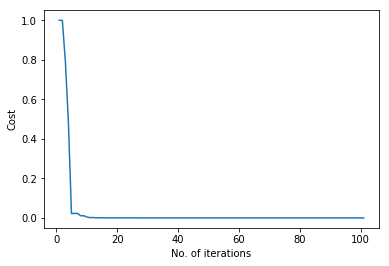

In [22]:
run_firefly_algorithm(easom,40,13,-7,1,5,0.5,100,100)

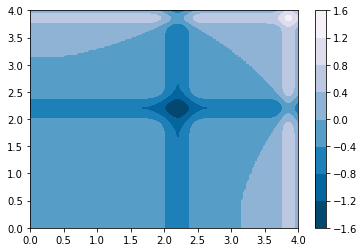

reset the fireflies
Overall best intensity: 0.8014131344410045, Overall best Accuracy: 44.490819654749615
Overall best intensity: 1.4637986457003935, Overall best Accuracy: 81.26345670906534
Overall best intensity: 1.5911102540427637, Overall best Accuracy: 88.33121934396068
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall best Accuracy: 88.47311597663006
Overall best intensity: 1.593666238087037, Overall b

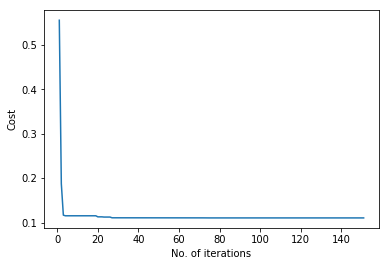

In [23]:
run_firefly_algorithm(michalewicz,40,4,0,1,5,0.5,150,100)